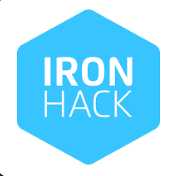

<h1 style="color: #00BFFF;">Exploratory Data Analysis Test</h1>

Exploratory data analysis (EDA) is amongst the first steps of analyzing data. 
* It is usually done with descriptive statistics, where you'll summarize the statistical aspects of your dataset and start to unravel your insights. 
* Further on, I highly recommend using data visualization in this step.

<h1 style="color: #00BFFF;">00 |</h1>

<div class="alert alert-block alert-info">
Tip # 1
Best practices; write all your libraries & functions at the beginning !
</div>

In [1]:
# 📚 Basic libraries
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# ⚙️ Settings
pd.set_option('display.max_columns', None) # display all columns
import warnings
warnings.filterwarnings('ignore') # ignore warnings

<h1 style="color: #00BFFF;">01 | Data Extraction</h1>

In [3]:
data = pd.read_csv('fifa_23.csv')

<h2 style="color: #008080;">Exploring the Data (First Impression)</h2>

In [4]:
data.sample()

,Known As,Full Name,Overall,Potential,Value(in Euro),Positions Played,Best Position,Nationality,Image Link,Age,Height(in cm),Weight(in kg),TotalStats,BaseStats,Club Name,Wage(in Euro),Release Clause,Club Position,Contract Until,Club Jersey Number,Joined On,On Loan,Preferred Foot,Weak Foot Rating,Skill Moves,International Reputation,National Team Name,National Team Image Link,National Team Position,National Team Jersey Number,Attacking Work Rate,Defensive Work Rate,Pace Total,Shooting Total,Passing Total,Dribbling Total,Defending Total,Physicality Total,Crossing,Finishing,Heading Accuracy,Short Passing,Volleys,Dribbling,Curve,Freekick Accuracy,LongPassing,BallControl,Acceleration,Sprint Speed,Agility,Reactions,Balance,Shot Power,Jumping,Stamina,Strength,Long Shots,Aggression,Interceptions,Positioning,Vision,Penalties,Composure,Marking,Standing Tackle,Sliding Tackle,Goalkeeper Diving,Goalkeeper Handling,GoalkeeperKicking,Goalkeeper Positioning,Goalkeeper Reflexes,ST Rating,LW Rating,LF Rating,CF Rating,RF Rating,RW Rating,CAM Rating,LM Rating,CM Rating,RM Rating,LWB Rating,CDM Rating,RWB Rating,LB Rating,CB Rating,RB Rating,GK Rating
16773,E. Emanuele,Ezequiel Emanuele,57,69,375000,"CM,CDM",CAM,Ecuador,https://cdn.sofifa.net/players/268/554/23_60.png,18,175,69,1606,342,Barcelona Sporting Club,500,900000,SUB,2024,30,2022,-,Right,3,3,1,-,https://cdn.sofifa.net/flags/ec.png,-,-,Medium,Medium,63,55,53,58,53,60,43,55,47,56,44,58,45,47,55,55,61,64,66,53,70,57,65,66,58,56,55,52,58,61,44,50,44,63,60,13,10,8,8,9,58,56,57,57,57,56,59,58,59,58,58,58,58,58,57,58,17


In [5]:
data.shape

(18539, 89)

**First impression:**
    
_____________

The following dataset is a collection of **one-year** 18.539 player information distributed among 89 different columns. The majority of our data types are mostly **numericals** (71 integers / 18 objects).

Our **project goal** is to identify players who have the potential to become **the next "Mbappé"**. After reading the [documentation](https://www.kaggle.com/datasets/ekrembayar/fifa-21-complete-player-dataset?select=fifa21_male2.csv) we wil proceed with the following **strategy**:

1. The **target** of our dataset will be `Overall Score`, which is a summary of a player's performance and potential. 
2. Through **Exploratory Data Analysis** we will identify the features that contribute to this prediction.
_____________

<h2 style="color: #008080;">Column standardization</h2>

In [6]:
data.columns = [column.lower().strip().replace(" ","_")for column in data.columns]

<h2 style="color: #008080;">Copy as best practices</h2>

In [7]:
df = data.copy()

<h1 style="color: #00BFFF;">02 | Data Cleaning</h1>

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18539 entries, 0 to 18538
Data columns (total 89 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   known_as                     18539 non-null  object
 1   full_name                    18539 non-null  object
 2   overall                      18539 non-null  int64 
 3   potential                    18539 non-null  int64 
 4   value(in_euro)               18539 non-null  int64 
 5   positions_played             18539 non-null  object
 6   best_position                18539 non-null  object
 7   nationality                  18539 non-null  object
 8   image_link                   18539 non-null  object
 9   age                          18539 non-null  int64 
 10  height(in_cm)                18539 non-null  int64 
 11  weight(in_kg)                18539 non-null  int64 
 12  totalstats                   18539 non-null  int64 
 13  basestats                    18

<h2 style="color: #008080;">Feature Selection (Dropping unnecesary features)</h2>

In [9]:
df.shape

(18539, 89)

_____________
From all features above, we will drop the following:
* `know_as`, `full_name`, `image_link`, `national_team_image` it's just the player identifier.
* `club_name`, `club_position`, `contract_until`, `club_jersey_number`, `joined_on`, `on_loan` these are specific to the player's current club situation and do not directly influence their potential or performance metrics.
* `national_team_name`, `national_team_position`, `national_team_jersey_number` are unnecessary details.
* `st_rating`, `lw_raating`, `cf_rating` are giving us to much detail of the player information, not needed if we are focusing on **overall score** and best position.
* Also, since we are looking for **field players** we can drop some goalkeeper-specific features like `goalkeeper_diving`, `goalkeeper_handling`, `_goalkeeperkicking`, `goalkeeper_positioning` and `goalkeeper_reflexes`
* Aggregated stats like `totalstats` and `basestats` are the sum of different stats. Same with `crossing`, `finishing`, etc., are the sum of `attacking`
    * Attacking = crossing, finishing, heading_accuracy, short_passing, volleys
    * Skill = dribbling, curve, fk_accuracy, long_passing, ball_control
    * Movement = acceleration, sprint_speed, agility, reactions, balance
    * Power = shot_power, jumping, stamina, strength, long_shots
    * Mentality = aggression, interceptions, positioning, vision, penalties, composure
    * Defending = marking, standing_tackle, sliding_tackle
_____________

In [10]:
df = df.drop(columns=['known_as', 'full_name', 'image_link', 'national_team_image_link',
                      'club_name', 'club_position', 'contract_until', 'club_jersey_number',
                      'joined_on', 'on_loan', 'national_team_name', 'national_team_position',
                      'national_team_jersey_number', 'st_rating', 'lw_rating', 'cf_rating',
                      'rf_rating', 'rw_rating', 'cam_rating', 'lm_rating', 'cm_rating',
                      'rm_rating', 'lwb_rating', 'cdm_rating', 'rwb_rating', 'lb_rating',
                      'cb_rating', 'rb_rating', 'gk_rating',
                      'goalkeeper_diving', 'goalkeeper_handling', 'goalkeeperkicking',
                      'goalkeeper_positioning', 'goalkeeper_reflexes', 'totalstats',
                      'basestats', 'crossing', 'finishing', 'volleys', 'dribbling', 
                      'curve', 'freekick_accuracy', 'longpassing', 'ballcontrol', 
                      'acceleration', 'sprint_speed', 'agility', 'reactions', 
                      'balance', 'shot_power', 'jumping', 'stamina', 'strength', 
                      'long_shots', 'aggression', 'interceptions', 'positioning', 
                      'vision', 'penalties', 'composure', 'marking', 'standing_tackle', 
                      'sliding_tackle', 'positions_played'])

In [11]:
df.shape

(18539, 25)

<h2 style="color: #008080;">Checking Null Values</h2>

In [12]:
df.isnull().sum()

overall                     0
potential                   0
value(in_euro)              0
best_position               0
nationality                 0
age                         0
height(in_cm)               0
weight(in_kg)               0
wage(in_euro)               0
release_clause              0
preferred_foot              0
weak_foot_rating            0
skill_moves                 0
international_reputation    0
attacking_work_rate         0
defensive_work_rate         0
pace_total                  0
shooting_total              0
passing_total               0
dribbling_total             0
defending_total             0
physicality_total           0
heading_accuracy            0
short_passing               0
lf_rating                   0
dtype: int64

<h2 style="color: #008080;">Checking Duplicates</h2>

In [13]:
df.duplicated().sum()

119

In [14]:
df.drop_duplicates(inplace=True)

<h2 style="color: #008080;">Checking Emtpy Spaces</h2>

In [15]:
df.eq(" ").sum()

overall                     0
potential                   0
value(in_euro)              0
best_position               0
nationality                 0
age                         0
height(in_cm)               0
weight(in_kg)               0
wage(in_euro)               0
release_clause              0
preferred_foot              0
weak_foot_rating            0
skill_moves                 0
international_reputation    0
attacking_work_rate         0
defensive_work_rate         0
pace_total                  0
shooting_total              0
passing_total               0
dribbling_total             0
defending_total             0
physicality_total           0
heading_accuracy            0
short_passing               0
lf_rating                   0
dtype: int64

<h2 style="color: #008080;">Moving our target to the right</h2>

In [16]:
target = df.pop('overall')

In [17]:
df['overall'] = target

<div class="alert alert-block alert-info">
Tip # 2
How to move your target to the right
</div>

[stackoverflow](https://stackoverflow.com/questions/35321812/move-column-in-pandas-dataframe)

<h1 style="color: #00BFFF;">03 | EDA (Exploratory Data Analysis)</h1>

<h2 style="color: #008080;">Statistical information about the numerical columns</h2>

In [18]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
potential,18420.0,7.096330e+01,6.170634e+00,48.0,67.0,71.0,75.0,95.0
value(in_euro),18420.0,2.842697e+06,7.645260e+06,0.0,475000.0,975000.0,2000000.0,190500000.0
age,18420.0,2.524392e+01,4.725456e+00,16.0,21.0,25.0,29.0,44.0
height(in_cm),18420.0,1.815508e+02,6.855181e+00,155.0,177.0,182.0,186.0,206.0
weight(in_kg),18420.0,7.517014e+01,7.006937e+00,49.0,70.0,75.0,80.0,105.0
wage(in_euro),18420.0,8.733100e+03,1.945242e+04,0.0,1000.0,3000.0,7000.0,450000.0
release_clause,18420.0,5.015212e+06,1.468605e+07,0.0,660000.0,1500000.0,3300000.0,366700000.0
weak_foot_rating,18420.0,2.944680e+00,6.734085e-01,1.0,3.0,3.0,3.0,5.0
skill_moves,18420.0,2.363626e+00,7.709092e-01,1.0,2.0,2.0,3.0,5.0
international_reputation,18420.0,1.086265e+00,3.590050e-01,1.0,1.0,1.0,1.0,5.0


<div class="alert alert-block alert-info">
Tip # 3

How to interpret basic statistics</div>

+ Measures of central tendency - Mean, median, mode
+ Measures of spread / dispersion - SD, var, range, quartiles, percentiles
+ Meaures of frequency - Frequency

+ **Range:** defines the difference between the highest and lowest values.
+ **Variance**: measures how far each number in the set is from the mean and thus from every other number in the set.
+ **Standard deviation:** The standard deviation is a statistic that measures the dispersion of a dataset relative to its mean and is calculated as the square root of the variance
+ **Quartiles:** A quartile is a statistical term that describes a division of observations into four defined intervals based on the values of the data and how they compare to the entire set of observations.
+ **Percentiles:** same but divided in 100 groups.

![quartiles](https://www.onlinemathlearning.com/image-files/median-quartiles.png)

### Exercise 1: What is the [Inter Quartile Range (IQR)](https://medium.com/@vinitasilaparasetty/quartiles-for-beginners-in-data-science-2ca5a640b07b)? What conclusions can we draw from `describe`?

In [19]:
num = df.select_dtypes(include='number')

In [20]:
Q1 = num.quantile(.25)
Q3 = num.quantile(.75)
IQR = round(Q3 - Q1,2)
IQR

potential                         8.0
value(in_euro)              1525000.0
age                               8.0
height(in_cm)                     9.0
weight(in_kg)                    10.0
wage(in_euro)                  6000.0
release_clause              2640000.0
weak_foot_rating                  0.0
skill_moves                       1.0
international_reputation          0.0
pace_total                       13.0
shooting_total                   20.0
passing_total                    12.0
dribbling_total                  11.0
defending_total                  28.0
physicality_total                14.0
heading_accuracy                 20.0
short_passing                    13.0
lf_rating                        15.0
overall                           8.0
dtype: float64

- <b>Potential:</b> The potential ratings of players have a moderate spread. The middle 50% of the data lies within a range of 8 units.

- <b>Value (in euro):</b> There is a substantial variability in the market value of players. The middle 50% of player values are spread over 1,525,000 euros, indicating significant differences in player valuations.  

- <b>Age:</b> The ages of players are moderately spread out. The middle 50% of players' ages are within an 8-year range.

- <b>Height:</b> There is a moderate variation in the heights of players, with the middle 50% of the data spread across 9 cm.   

- <b>Weight:</b> The weights of players show a moderate spread, with the middle 50% of weights differing by 10 kg.

- <b>Wage:</b> There is notable variability in player wages, with the middle 50% of wages differing by 6,000 euros.   

- <b>Release Clause:</b> The release clauses of players exhibit high variability. The middle 50% of release clause values are spread over 2,640,000 euros.   

- <b>Weak Foot Rating:</b> There is no variability in weak foot rating, indicating that all players have the same weak foot rating within the middle 50%.   

- <b>Skill Moves:</b> There is low variability in the skill moves rating, with the middle 50% of players having a range of just 1 skill move rating.   

- <b>International Reputation:</b> There is no variability in international reputation within the middle 50% of the data, suggesting all players have the same rating in this category.

- <b>Pace Total:</b> There is moderate variability in the pace ratings of players, with a spread of 13 units for the middle 50%.  

- <b>Shooting Total:</b> Shooting abilities among players show considerable variation, with a 20-unit range for the middle 50%.   

- <b>Passing Total:</b> The passing skills of players have moderate variability, with the middle 50% of values differing by 12 units.

- <b>Dribbling Total:</b> There is moderate variability in dribbling skills, with an 11-unit spread for the middle 50% of players. 

- <b>Defending Total:</b> high variability, with a 28-unit range for the middle 50% of players.

- <b>Physicality Total:</b> There is moderate variability in physicality ratings, with a 14-unit spread for the middle 50%.  

- <b>Heading Accuracy:</b> There is considerable variation in heading accuracy among players, with a 20-unit range for the middle 50%.   

- <b>Short Passing:</b> show moderate variability, with a 13-unit range for the middle 50%.   

- <b>LF Rating:</b> moderate variability, with a 15-unit spread for the middle 50%.

- <b>Overall:</b> The overall ratings of players have moderate variability, with the middle 50% of players having a range of 8 units.


<h2 style="color: #008080;">Selecting numerical</h2>

In [21]:
#num = df.select_dtypes(include="number")

<h2 style="color: #008080;">Checking Distributions</h2>

#### Using maptplotlib ---> Check [documentation](https://matplotlib.org/) !

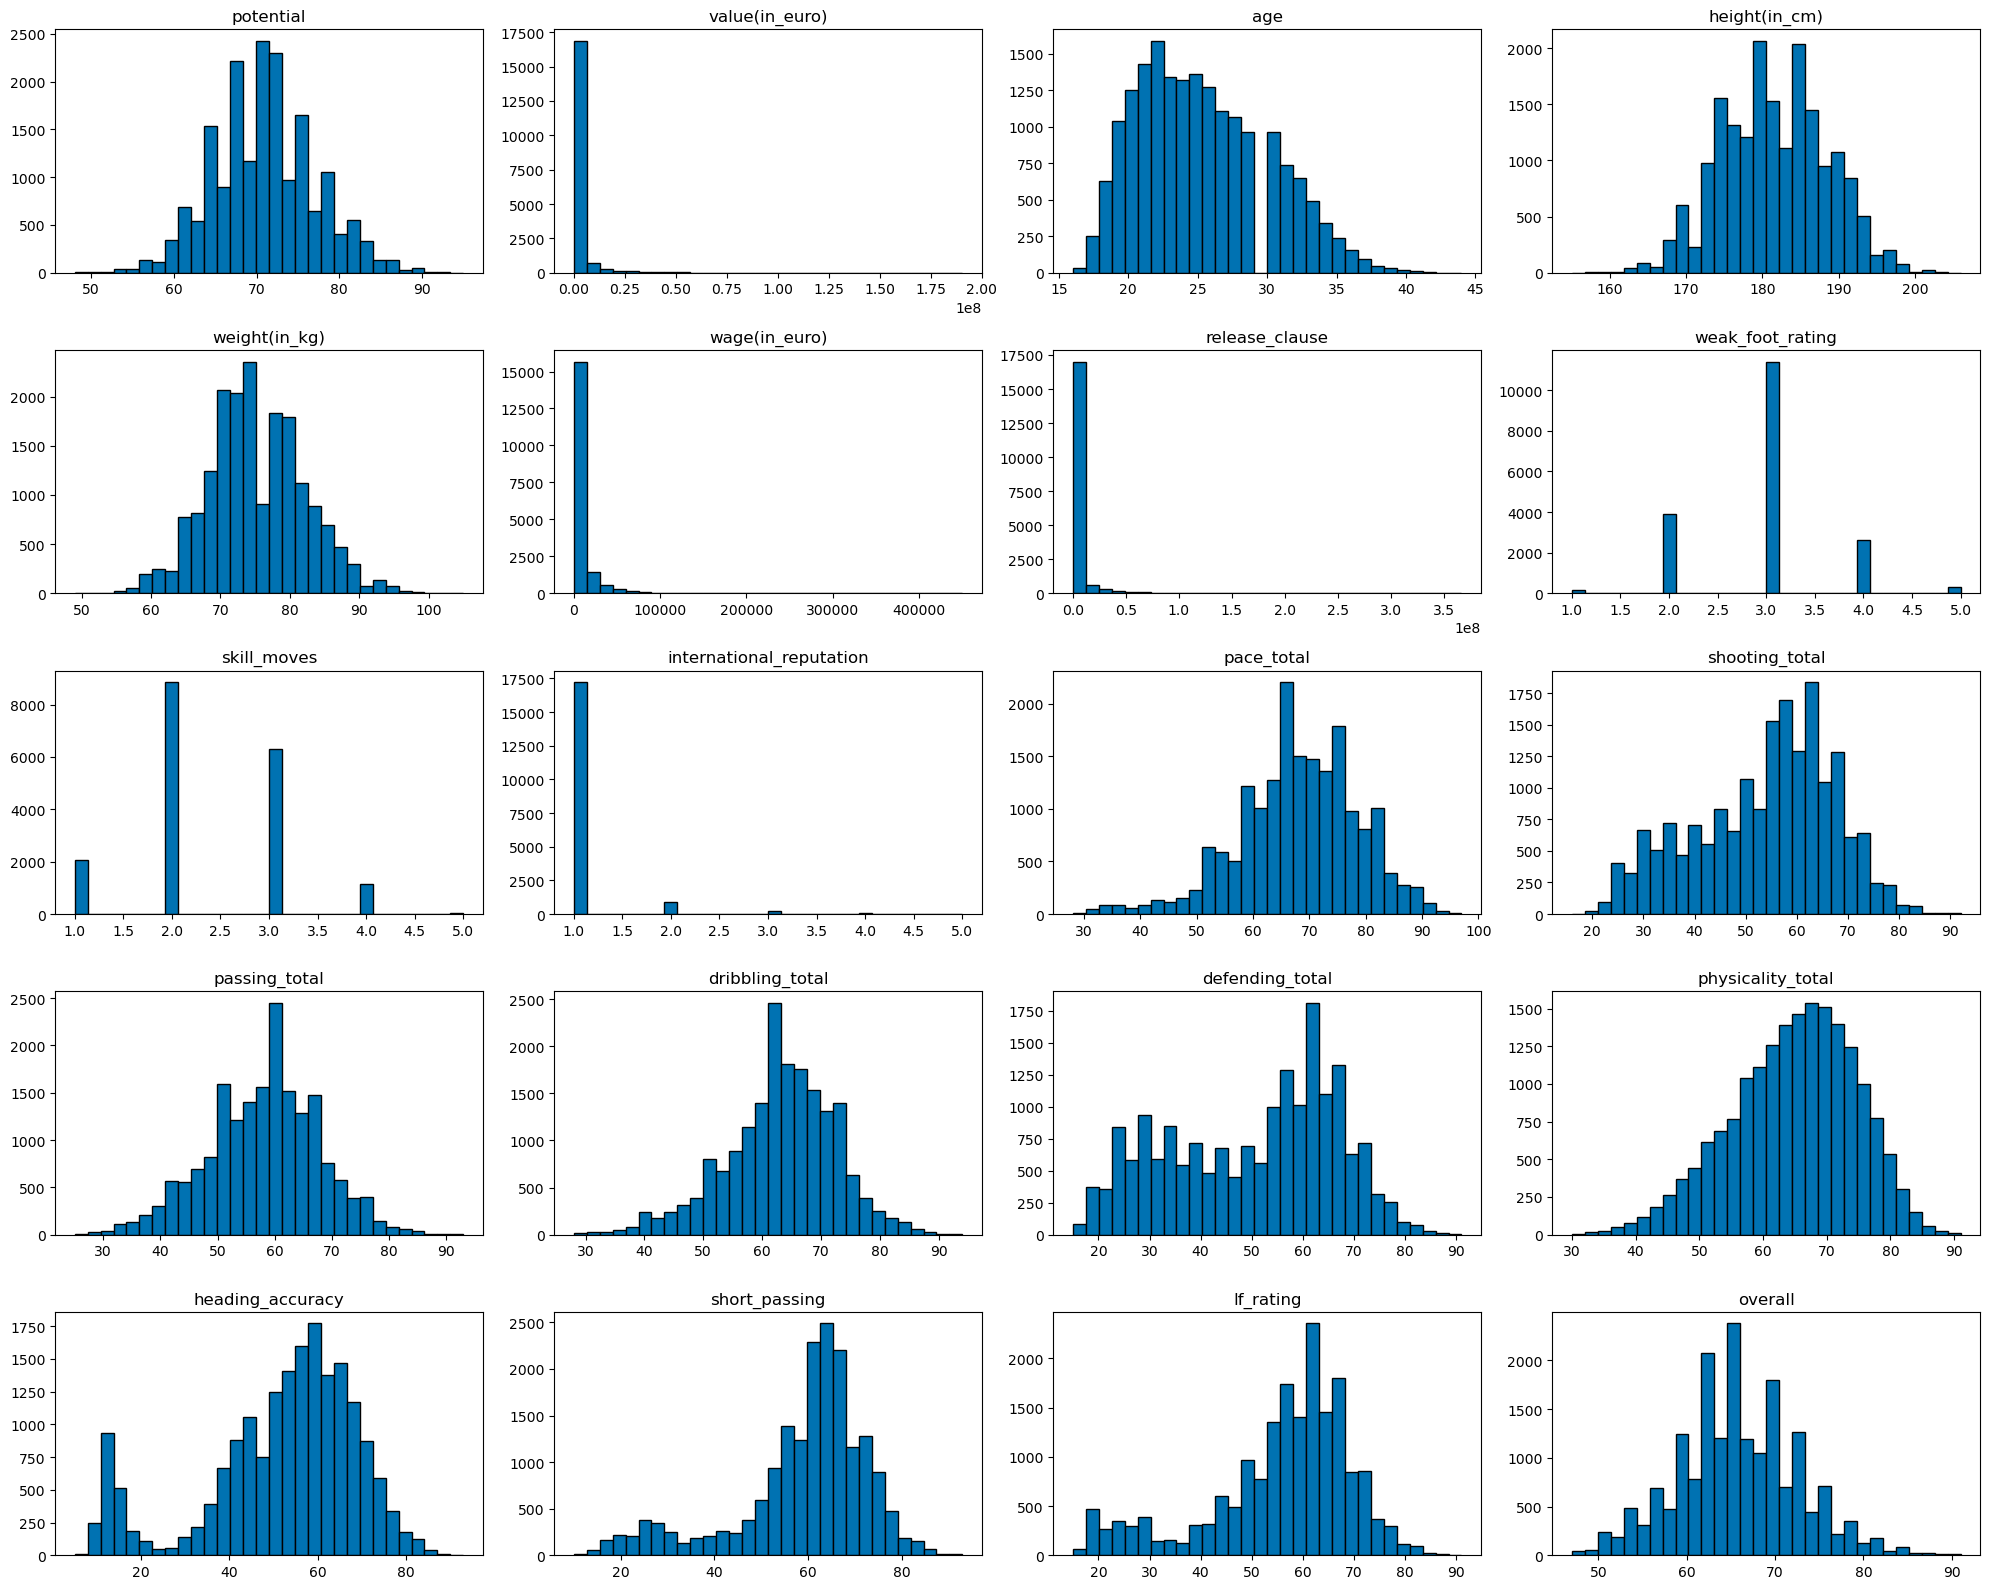

In [22]:
color = '#0072B2'

# grid size
nrows, ncols = 5, 4  # adjust for your number of features

fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(20, 16))

axes = axes.flatten()

# Plot each numerical feature
for i, ax in enumerate(axes):
    if i >= len(num.columns):
        ax.set_visible(False)  # hide unesed plots
        continue
    ax.hist(num.iloc[:, i], bins=30, color=color, edgecolor='black')
    ax.set_title(num.columns[i])

plt.tight_layout()
plt.show()

In [23]:
df.international_reputation.value_counts()

international_reputation
1    17216
2      888
3      254
4       55
5        7
Name: count, dtype: int64

### Exercise 2: How do we interpret these histograms?

In [24]:
# your solution

Potential, Height, weight, pace, passing, dribbling, physicality_total, overall rating show more symmetric, <b>normal-like</b> distributions.   

Value, Wage, Release exhibit significant <b>skewness</b>, typically <b>right-tail</b> due to a few high-value outliers.

Weak foot rating, skill moves,international_reputation display values are represented by <b>discrete categories</b>.

Age shows <b>approximately normal</b> with a <b>slight left-tail</b>. This implies that while ages are generally evenly spread, there is a slightly higher concentration of younger players in the dataset. 

Shooting appears to be <b>approximately normal</b> or symmetric, with a <b>slight right-tail</b>. This distribution suggests that shooting abilities among players are diverse but centered around a typical shooting_total score of approximately 60.


Defending, Heading accuracy, Short passing, LF rating shows the distribution is <b>slightly negatively skewed</b>, with more players having higher scores and fewer with lower scores.

In [25]:
boxplot = num[['value(in_euro)', 'wage(in_euro)', 'release_clause', 'dribbling_total', 'short_passing', 'lf_rating']]

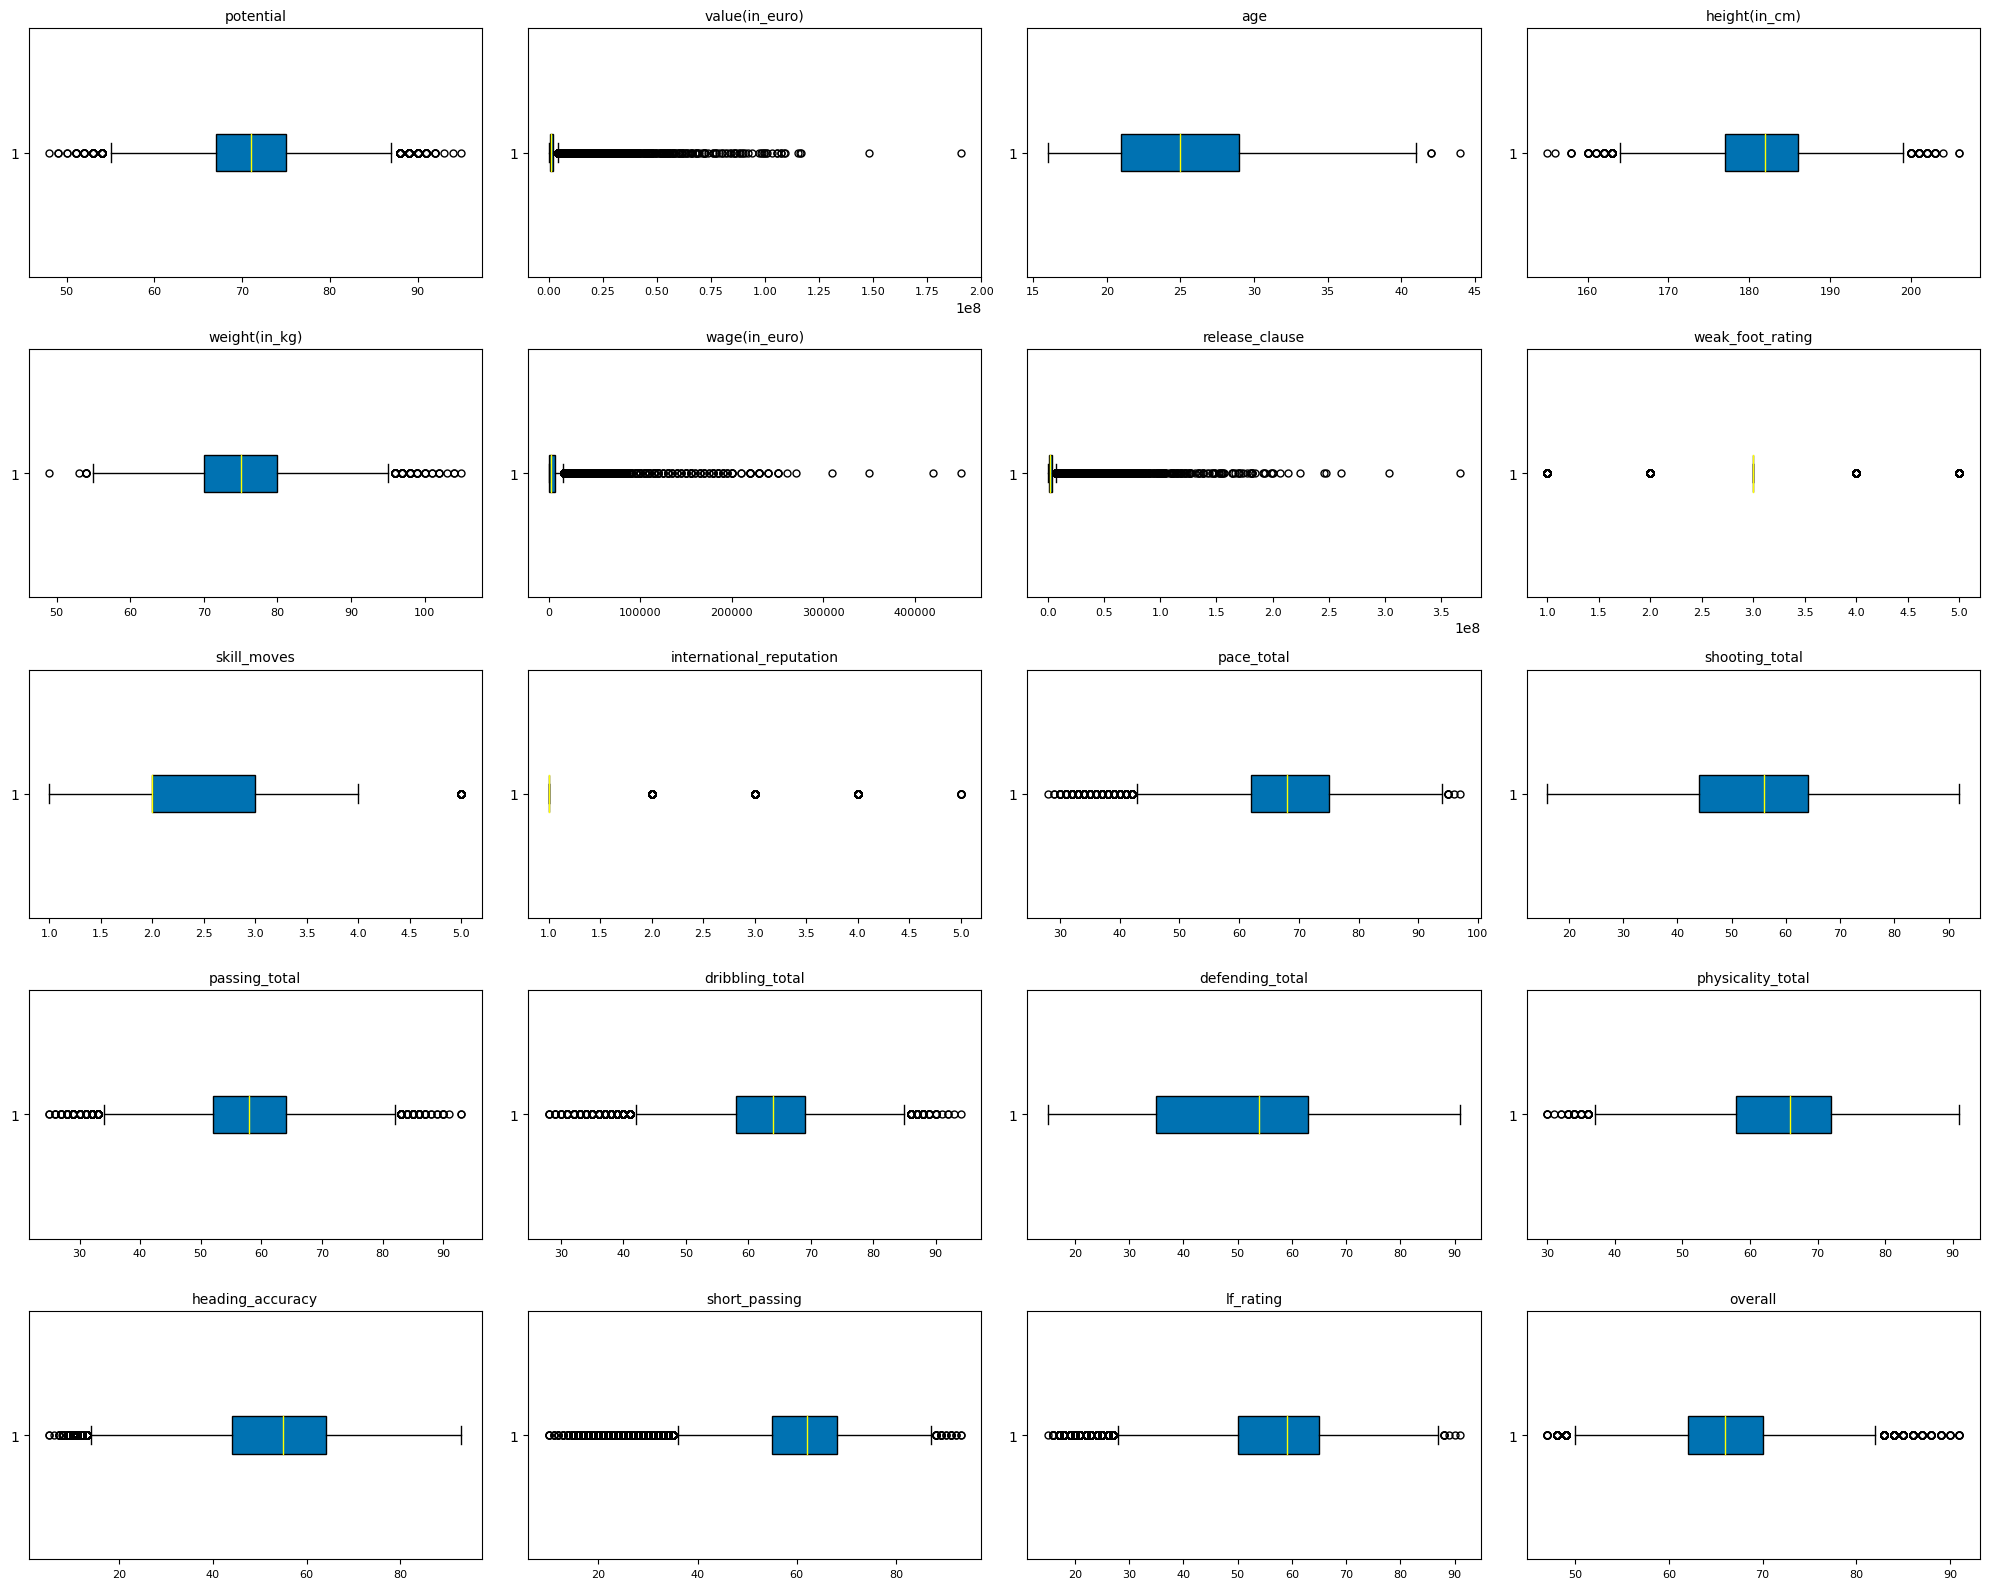

In [26]:
color = '#0072B2'

# grid size
nrows, ncols = 5, 4 

fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(20, 16))

axes = axes.flatten()

for i, ax in enumerate(axes):
    if i >= len(num.columns):
        ax.set_visible(False)
        continue
    ax.boxplot(num.iloc[:, i].dropna(), vert=False, patch_artist=True, 
               boxprops=dict(facecolor=color, color='black'), 
               medianprops=dict(color='yellow'), whiskerprops=dict(color='black'), 
               capprops=dict(color='black'), flierprops=dict(marker='o', color='red', markersize=5))
    ax.set_title(num.columns[i], fontsize=10)
    ax.tick_params(axis='x', labelsize=8)

plt.tight_layout()
plt.show()

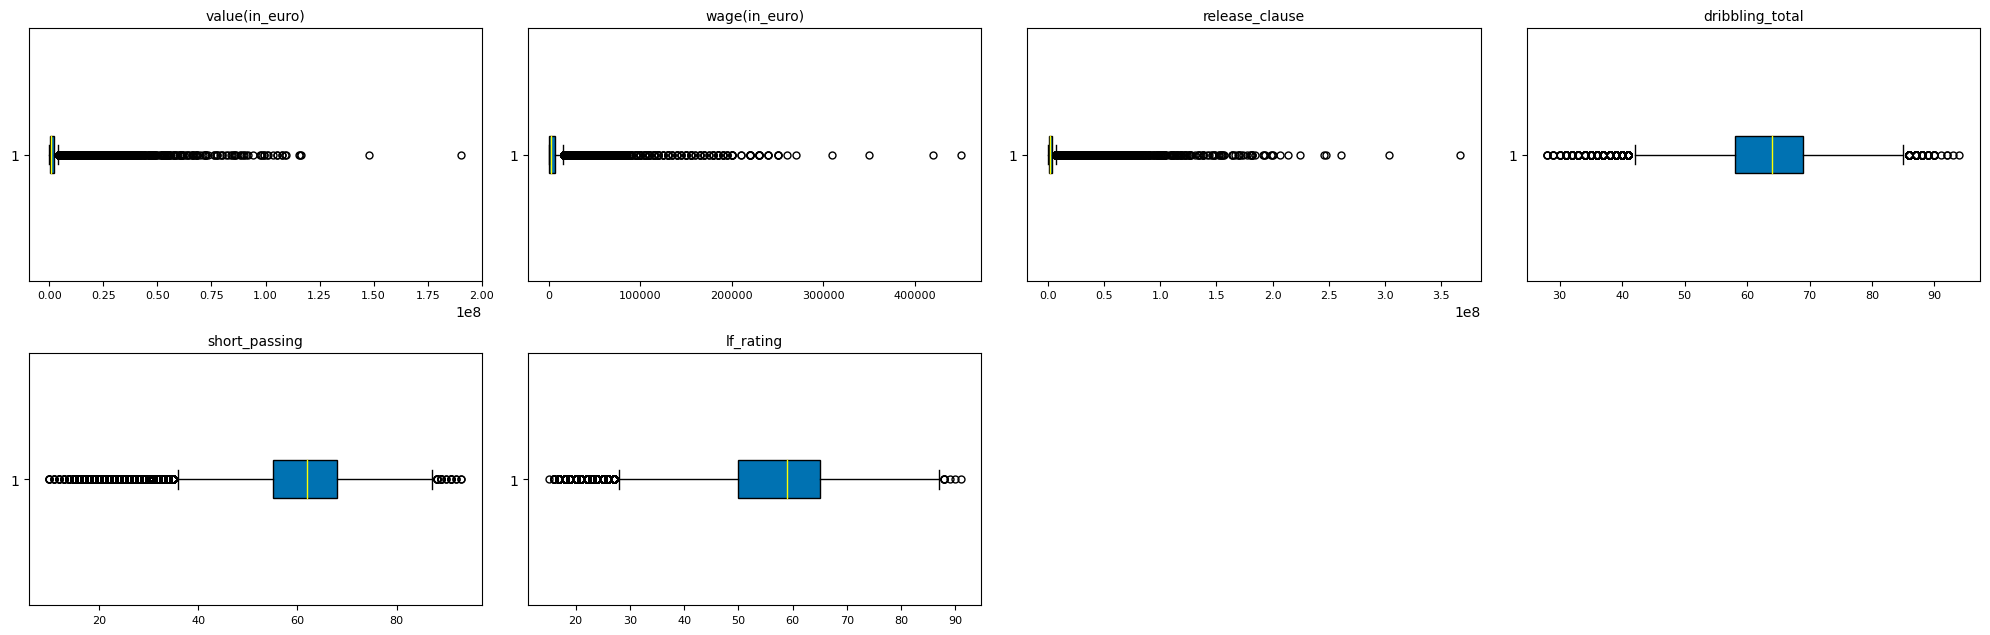

In [27]:
color = '#0072B2'

# grid size
nrows, ncols = 5, 4 

fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(20, 16))

axes = axes.flatten()

for i, ax in enumerate(axes):
    if i >= len(boxplot.columns):
        ax.set_visible(False)
        continue
    ax.boxplot(boxplot.iloc[:, i].dropna(), vert=False, patch_artist=True, 
               boxprops=dict(facecolor=color, color='black'), 
               medianprops=dict(color='yellow'), whiskerprops=dict(color='black'), 
               capprops=dict(color='black'), flierprops=dict(marker='o', color='red', markersize=5))
    ax.set_title(boxplot.columns[i], fontsize=10)
    ax.tick_params(axis='x', labelsize=8)  # Adjust x-axis ticks

plt.tight_layout()
plt.show()

### Exercise 3: What conclusions can you draw from the box plots?

Value, Wage, Release exhibit significant outliers at the upper end. 
- Value: indicates that some players have exceptionally high market values compared to the majority.
- Wage: suggest that some players earn exceptionally high wages compared to others.
- Release: suggests that some players have exceptionally high release clauses compared to the majority.

Dribbling_total values below 41.5 are considered lower outliers.
These lower outliers may represent players with unusually poor dribbling skills compared to the majority of players in the dataset.
Dribbling_total values above 85.5 are considered upper outliers.These upper outliers may indicate players with exceptionally high dribbling skills that exceed the typical range found in the dataset.

<h2 style="color: #008080;">Looking for Correlations</h2>

In [28]:
num_corr = round(num.corr(),2)
num_corr

,potential,value(in_euro),age,height(in_cm),weight(in_kg),wage(in_euro),release_clause,weak_foot_rating,skill_moves,international_reputation,pace_total,shooting_total,passing_total,dribbling_total,defending_total,physicality_total,heading_accuracy,short_passing,lf_rating,overall
potential,1.00,0.53,-0.26,0.02,-0.00,0.50,0.51,0.15,0.27,0.33,0.29,0.28,0.45,0.50,0.18,0.20,0.19,0.37,0.34,0.66
value(in_euro),0.53,1.00,0.03,0.01,0.03,0.82,0.98,0.15,0.25,0.58,0.20,0.27,0.40,0.40,0.16,0.23,0.17,0.30,0.29,0.56
age,-0.26,0.03,1.00,0.07,0.22,0.15,0.03,0.06,0.06,0.24,-0.14,0.25,0.34,0.22,0.23,0.44,0.16,0.15,0.11,0.45
height(in_cm),0.02,0.01,0.07,1.00,0.75,0.03,0.01,-0.16,-0.43,0.04,-0.37,-0.08,-0.18,-0.27,0.04,0.41,0.01,-0.34,-0.44,0.03
weight(in_kg),-0.00,0.03,0.22,0.75,1.00,0.05,0.02,-0.13,-0.35,0.08,-0.32,-0.01,-0.09,-0.18,0.05,0.49,0.04,-0.27,-0.35,0.13
wage(in_euro),0.50,0.82,0.15,0.03,0.05,1.00,0.79,0.16,0.26,0.63,0.16,0.29,0.43,0.42,0.19,0.27,0.20,0.32,0.31,0.60
release_clause,0.51,0.98,0.03,0.01,0.02,0.79,1.00,0.14,0.23,0.55,0.19,0.26,0.38,0.38,0.16,0.22,0.15,0.28,0.27,0.53
weak_foot_rating,0.15,0.15,0.06,-0.16,-0.13,0.16,0.14,1.00,0.34,0.13,0.16,0.22,0.22,0.25,-0.02,0.03,0.19,0.31,0.37,0.20
skill_moves,0.27,0.25,0.06,-0.43,-0.35,0.26,0.23,0.34,1.00,0.19,0.36,0.31,0.34,0.43,0.03,-0.04,0.43,0.69,0.81,0.36
international_reputation,0.33,0.58,0.24,0.04,0.08,0.63,0.55,0.13,0.19,1.00,0.04,0.25,0.35,0.32,0.13,0.19,0.14,0.23,0.21,0.45


<div class="alert alert-block alert-info">
Tip # 4
    
- We don't want multicolinearity --> correlation between features biases the model...
- We want high correlations (+ or -) with the target --> valuable information for the predictions</div>

#### Checking correlations with [Seaborn](https://seaborn.pydata.org/index.html)

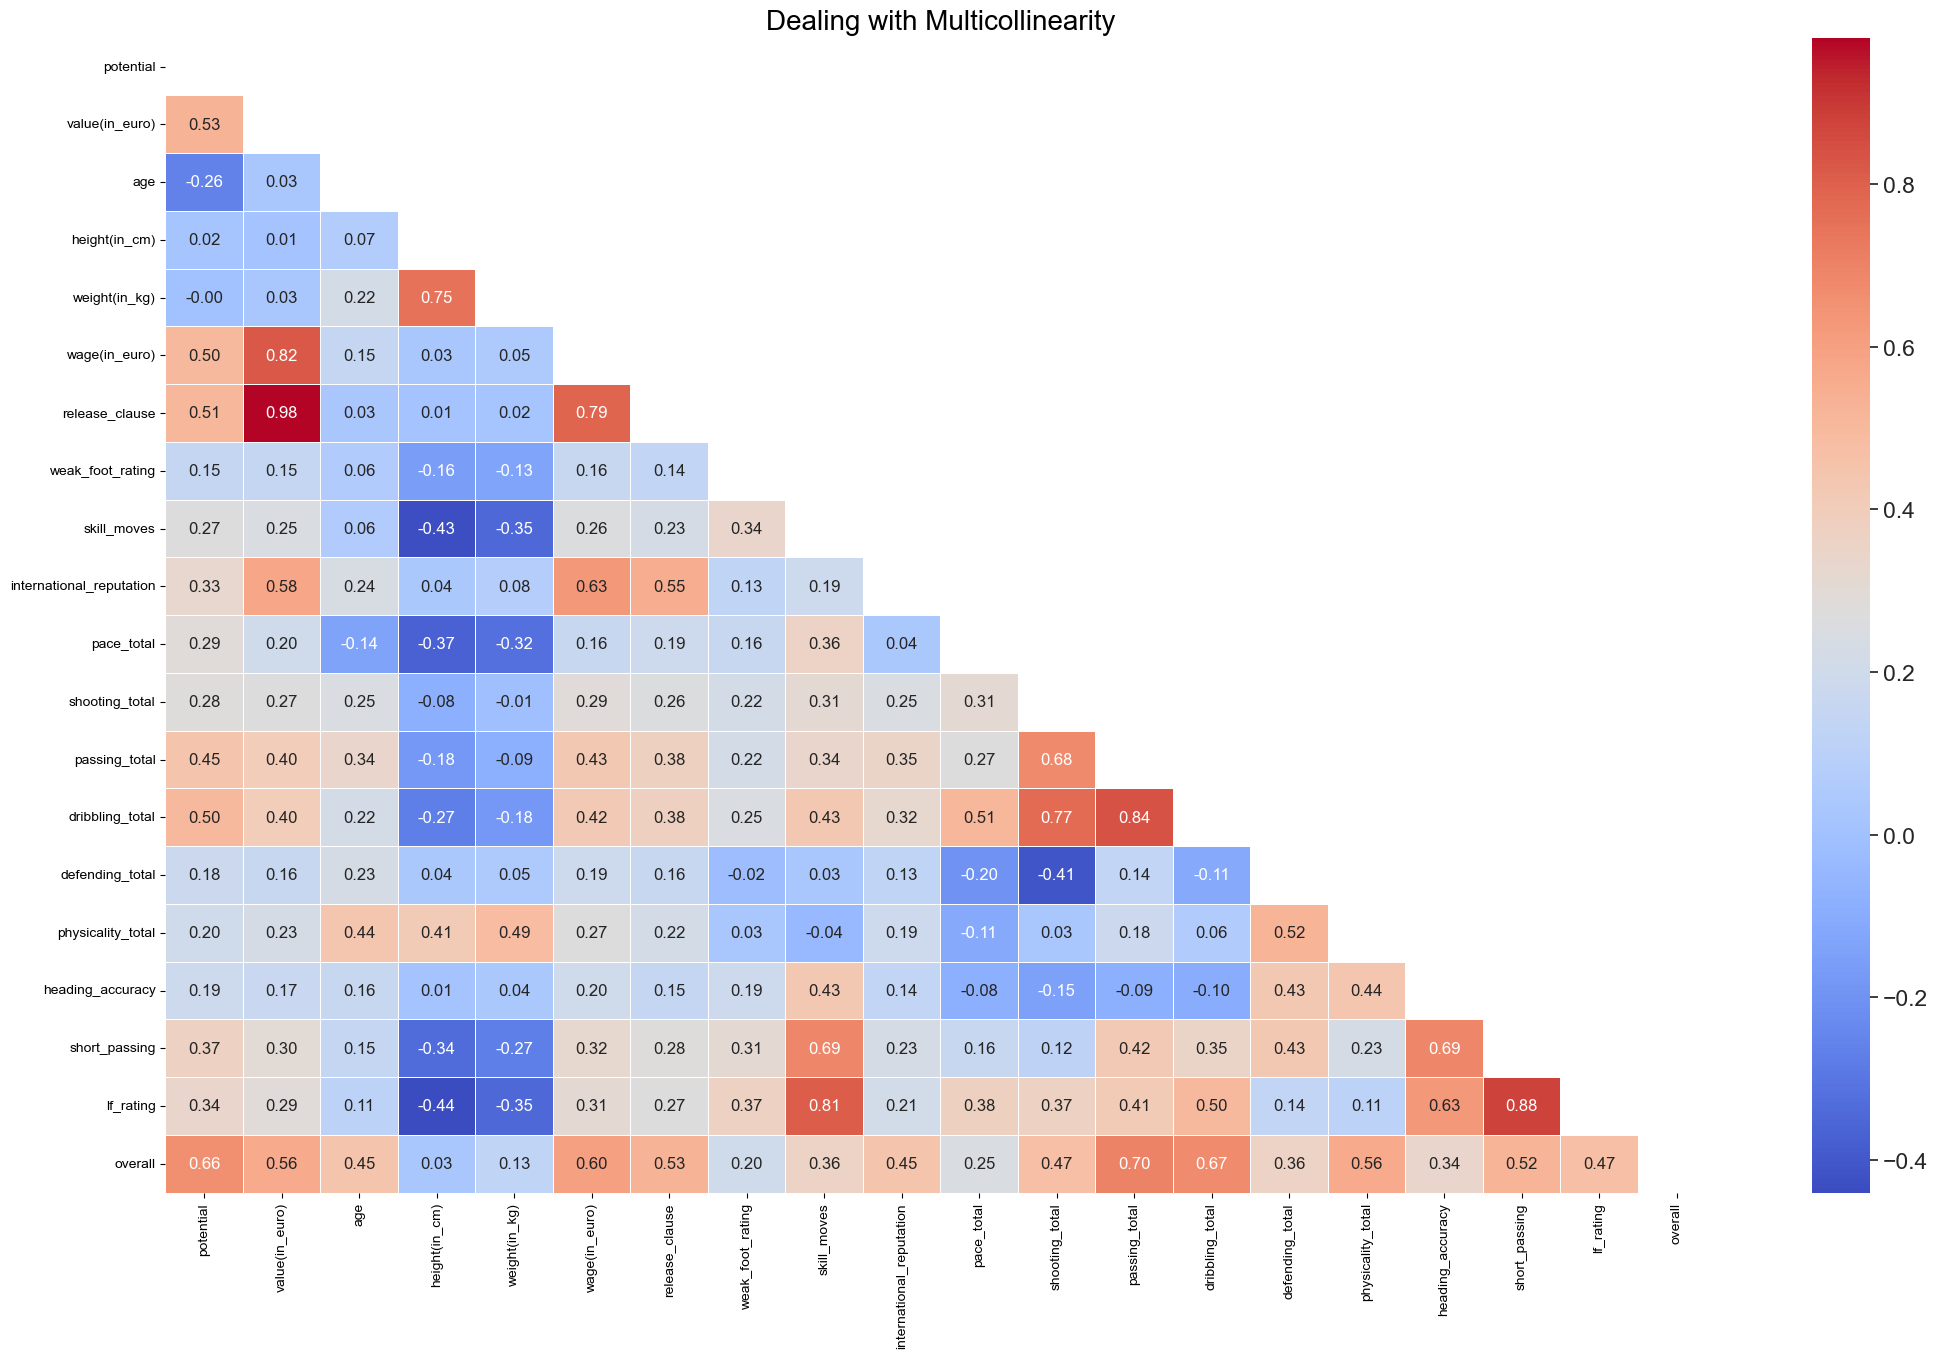

In [29]:
# Correlation Matrix-Heatmap Plot
mask = np.zeros_like(num_corr)
mask[np.triu_indices_from(mask)] = True # optional, to hide repeat half of the matrix
f, ax = plt.subplots(figsize=(25, 15))
sns.set(font_scale=1.5) # increase font size
ax = sns.heatmap(num_corr, mask=mask, annot=True, annot_kws={"size": 12}, linewidths=.5, cmap="coolwarm", fmt=".2f", ax=ax) # round to 2 decimal places
ax.set_title("Dealing with Multicollinearity", fontsize=20) # add title
plt.show()

### Exercise 4: How to interpret this correlation matrix? Which other correlation methods we know?

Positive correlation: Indicates that as one variable increases, the other tends to also increase. There is a strong correlation between "value(in_euro)" and "release_clause" (0.98), suggesting that players with higher market values also tend to command higher release_clause or there is a strong correlation between "short_passing" and "lf_rating" (0.88), suggesting that players with higher short passing values may also have higher lf rating.

Negative correlation: Indicates that as one variable increases, the other tends to decrease. For instance "height(in_cm)" and "lf_rating" have a negative correlation (-0.44), meaning taller players tend to have lower lf rating. or correlation between "height(in_cm)" and "skill_moves" (-0.43) shows taller players may have lower skill moves.


No correlation: "age" and "value(in_euro)" have a very low correlation (0.03), suggesting age does not significantly affect player market value according to this dataset.


In [30]:
pearson_correlation = num.corrwith(df['overall']).sort_values(ascending=False)
pearson_correlation

overall                     1.000000
passing_total               0.698714
dribbling_total             0.674058
potential                   0.657323
wage(in_euro)               0.598478
physicality_total           0.560810
value(in_euro)              0.560209
release_clause              0.529659
short_passing               0.520006
lf_rating                   0.474095
shooting_total              0.465091
international_reputation    0.450971
age                         0.446743
defending_total             0.361420
skill_moves                 0.360564
heading_accuracy            0.341229
pace_total                  0.249877
weak_foot_rating            0.199860
weight(in_kg)               0.132019
height(in_cm)               0.033450
dtype: float64

pearson method also shows the most correlation with target is "passing_total"(0.69)

### Specific Correlations with the Target

All the columns have positive correlation with the Target and the total passing have the strongest relation(0.698) and height have the lowest correlation(0.033) as shown also in heatmap and pearson method.

In [31]:
corr_with_target = num.corrwith(df["overall"]).sort_values(ascending=False)

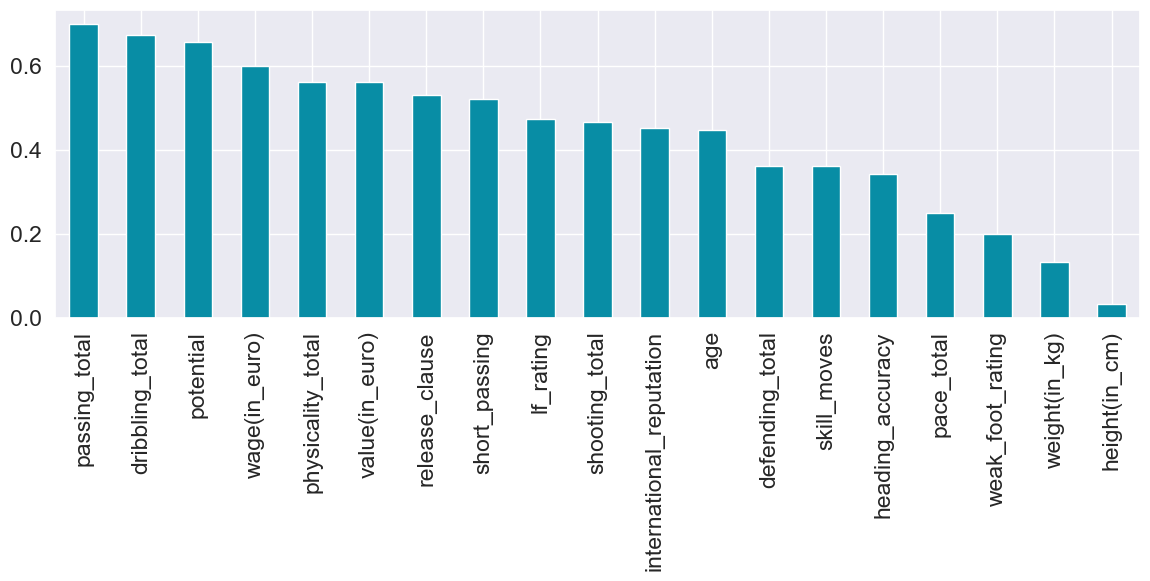

In [32]:
plt.figure(figsize=(14,4))
corr_with_target.drop("overall").plot.bar(color = '#088da5')
plt.show();

### Formulate the Null Hypothesis

Null hypothesis: there is no correlation between age and wage

### Perform 3 Plots and Explain the Findings from the Data

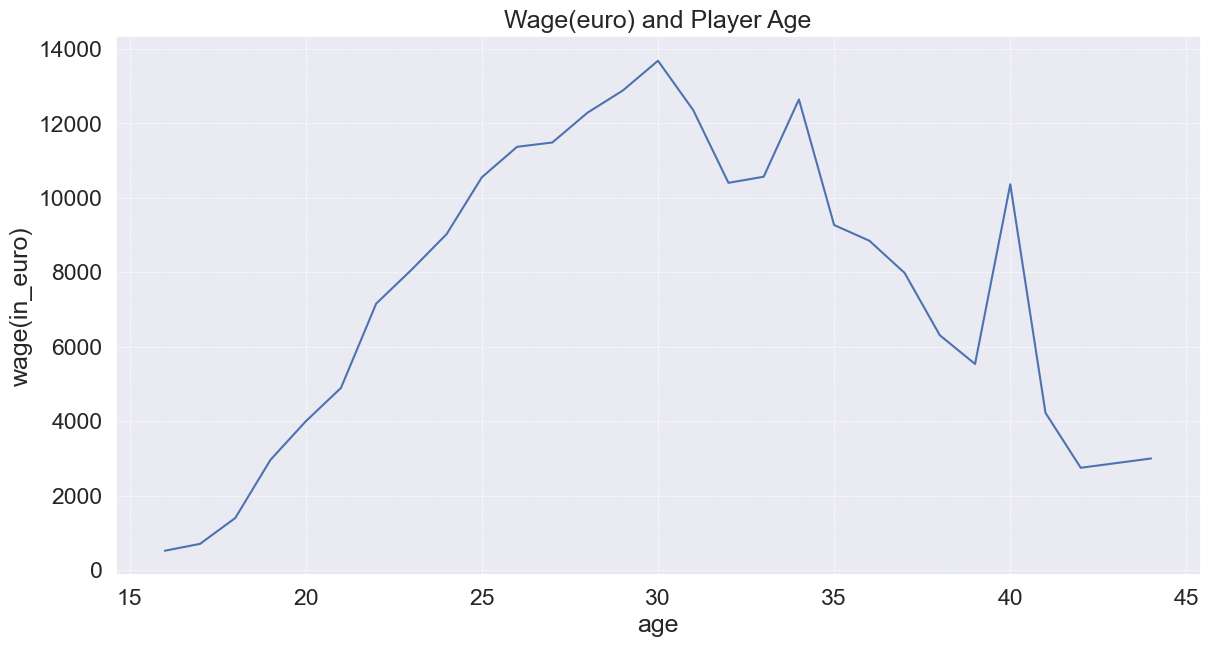

In [33]:
plt.figure(figsize=(14, 7))
sns.lineplot(data=df, x='age', y='wage(in_euro)', ci=None)
plt.title('Wage(euro) and Player Age')
plt.grid(True, which='both', linestyle='--', linewidth=0.5)

<Axes: xlabel='passing_total', ylabel='dribbling_total'>

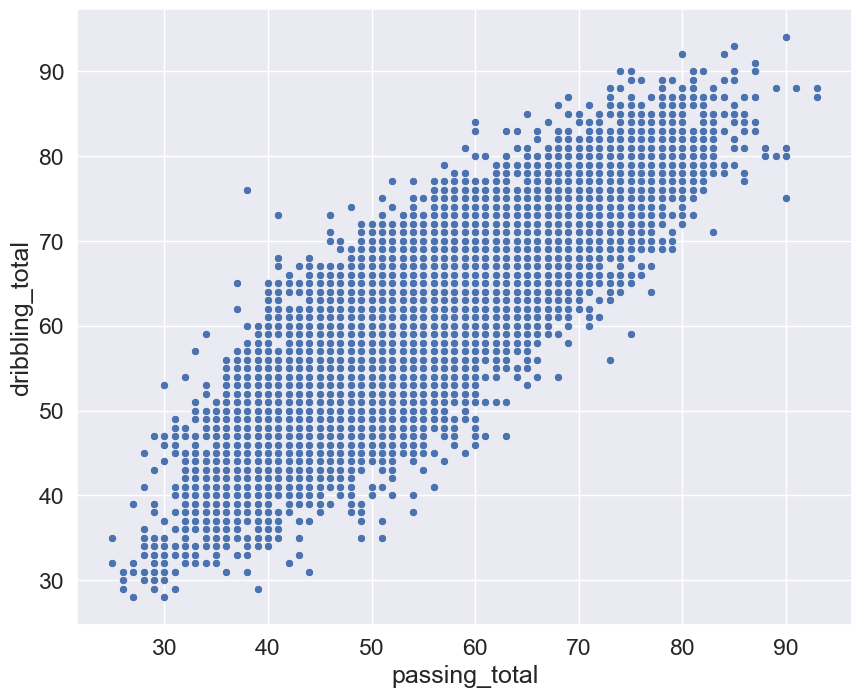

In [41]:
plt.figure(figsize=(10, 8))
sns.scatterplot(data=df, x='passing_total', y='dribbling_total')

In [35]:
df.nunique()

potential                     48
value(in_euro)               257
best_position                 15
nationality                  160
age                           28
height(in_cm)                 49
weight(in_kg)                 54
wage(in_euro)                133
release_clause              1236
preferred_foot                 2
weak_foot_rating               5
skill_moves                    5
international_reputation       5
attacking_work_rate            3
defensive_work_rate            3
pace_total                    70
shooting_total                75
passing_total                 68
dribbling_total               67
defending_total               76
physicality_total             62
heading_accuracy              88
short_passing                 84
lf_rating                     77
overall                       45
dtype: int64

<Axes: xlabel='skill_moves', ylabel='weight(in_kg)'>

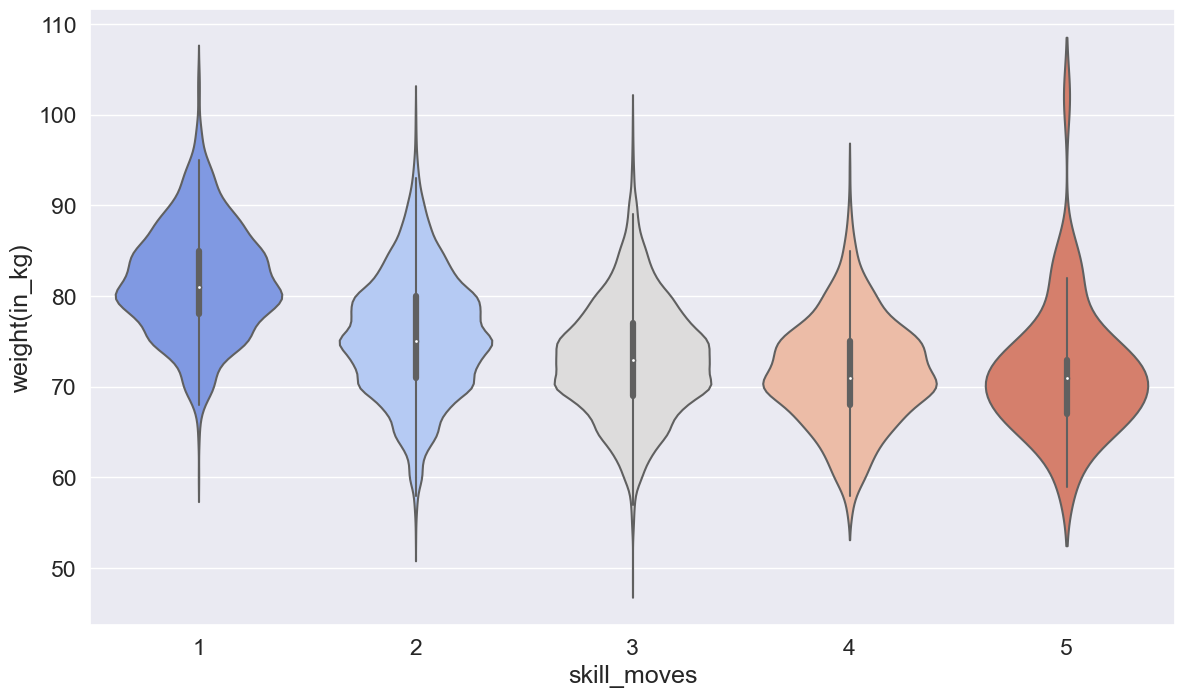

In [36]:
plt.figure(figsize=(14,8))
sns.violinplot(data=df, x='skill_moves', y='weight(in_kg)', palette="coolwarm")

<h1 style="color: #00BFFF;">04 | Data Processing</h1>

<h2 style="color: #008080;">X-Y Split</h2>

<h2 style="color: #008080;">Normalizing the Data</h2>

<h1 style="color: #00BFFF;">05 | Modeling</h1>

<h2 style="color: #008080;">Train-Test Split</h2>

<h2 style="color: #008080;">Model Validation</h2>

<h1 style="color: #00BFFF;">06 | Improving the Model</h1>

<h1 style="color: #00BFFF;">07 | Reporting</h1>